<a href="https://colab.research.google.com/github/Gogulaanand/Fault-Diagnosis/blob/master/Fault_Diagnosis(keras).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf                                    #importing neccessary libraries and functions 
import numpy as np
import random as rn
np.random.seed(1132)
tf.set_random_seed(1503)
rn.seed(654)
from tensorflow.keras import layers
import pandas as pd
import io
import keras
from keras.layers import Dense,Dropout,Activation,BatchNormalization
from keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
from google.colab import files                                  #uploading the file 
uploaded=files.upload()

Saving projdata1.csv to projdata1 (1).csv


In [0]:
df=pd.read_csv(io.StringIO(uploaded['projdata1.csv'].decode("utf-8")),engine='python',sep=",")  #reading the data from the uploaded file
ds=df.sample(frac=1)                                                                                #shuffling the data

y=ds.as_matrix(columns=ds.columns[4:])                                                    #seggregate the date into X,Y variables based on columns
X=ds.as_matrix(columns=ds.columns[1:4])
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2)
Y_train=to_categorical(Y_train,num_classes=4,dtype='int32')
Y_test=to_categorical(Y_test,num_classes=4,dtype='int32')

In [0]:
import os
os.environ['PYTHONHASHSEED']='0'

In [21]:
model=tf.keras.Sequential()                                                     #defining the structure of the ANN model

model.add(layers.Dense(10,input_shape=(3,)))
# model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=0.2))
model.add(layers.Dense(15))
model.add(layers.LeakyReLU(alpha=0.2))
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('LeakyReLU'))
# model.add(layers.Dense(10))
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('LeakyReLU'))
model.add(layers.Dense(10))
model.add(layers.LeakyReLU(alpha=0.2))
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('LeakyReLU'))
model.add(layers.Dense(4))
# model.add(layers.BatchNormalization())
model.add(layers.Activation('softmax'))
# model.add(layers.Dense(10,activation='relu'))
# model.add(layers.Dense(10,activation='relu'))
# model.add(layers.Dense(4,activation='softmax'))
# bias_regularizer=tf.keras.regularizers.l2(0.01),
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(4,activation='relu'))
# model.add(layers.Dropout(0.5))

model.compile(loss='categorical_crossentropy',optimizer=tf.train.AdamOptimizer(0.001),metrics=['accuracy'])

history=model.fit(X_train,Y_train,validation_split=0.20,epochs=200,batch_size=128,shuffle=False)          #training the ANN model

Train on 64000 samples, validate on 16000 samples
Epoch 1/200
64000/64000 [==============================] - 1s 21us/sample - loss: 9.2121 - acc: 0.2707 - val_loss: 7.5455 - val_acc: 0.2766
Epoch 2/200
64000/64000 [==============================] - 1s 15us/sample - loss: 5.4962 - acc: 0.2826 - val_loss: 4.4656 - val_acc: 0.2883
Epoch 3/200
64000/64000 [==============================] - 1s 15us/sample - loss: 3.6894 - acc: 0.3058 - val_loss: 2.5207 - val_acc: 0.3148
Epoch 4/200
64000/64000 [==============================] - 1s 15us/sample - loss: 1.6742 - acc: 0.3388 - val_loss: 1.4626 - val_acc: 0.3646
Epoch 5/200
64000/64000 [==============================] - 1s 15us/sample - loss: 1.3995 - acc: 0.3716 - val_loss: 1.3265 - val_acc: 0.3885
Epoch 6/200
64000/64000 [==============================] - 1s 15us/sample - loss: 1.3354 - acc: 0.3982 - val_loss: 1.2957 - val_acc: 0.4202
Epoch 7/200
64000/64000 [==============================] - 1s 15us/sample - loss: 1.2976 - acc: 0.4221 - val_l

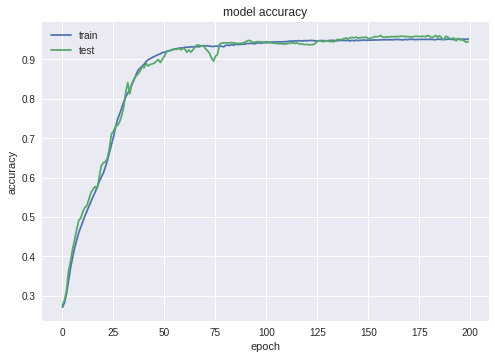

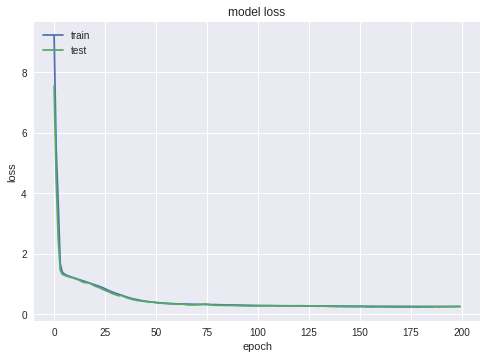

20000/20000 [==============================] - 0s 17us/sample - loss: 0.2772 - acc: 0.9438
0.94375


In [22]:
plt.plot(history.history['acc'])                                                  #model accuracy plot
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
                                                                                  #model loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

test_loss,test_acc=model.evaluate(X_test,Y_test,batch_size=64)                    #test data evaluation(data unseen by the ANN)
print(test_acc)